<a href="https://colab.research.google.com/github/atikahlestar/Data-Analysis/blob/main/Kasus_3_Customer_Complaint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kasus 03 : Toko "HappyMart"
"HappyMart" adalah sebuah jaringan supermarket terkenal yang memiliki banyak cabang di seluruh Indonesia. Mereka menyediakan berbagai kebutuhan sehari-hari, mulai dari makanan, minuman, hingga produk rumah tangga lainnya. Untuk meningkatkan layanan pelanggan, tim Data Analyst HappyMart sedang melakukan analisis terhadap data keluhan dan perilaku pelanggan.

Tim berharap dapat memahami lebih dalam mengenai keluhan utama pelanggan, distribusi frekuensi kunjungan, pengaruh waktu tunggu terhadap kepuasan, serta faktor-faktor lain yang memengaruhi pengalaman pelanggan. Analisis ini akan digunakan untuk memperbaiki layanan dan mempertahankan loyalitas pelanggan di HappyMart. Berikut adalah beberapa pertanyaan yang ingin dijawab oleh tim Data Analyst:
1. Keluhan apa yang paling banyak diajukan oleh pelanggan? Tim ingin mengetahui jenis keluhan yang sering disampaikan pelanggan, seperti "produk tidak tersedia", "antrian terlalu lama", atau "kualitas layanan".
2. Bagaimana distribusi frekuensi kunjungan pelanggan? HappyMart ingin memahami pola kunjungan pelanggan mereka, seperti seberapa sering pelanggan datang ke toko—apakah mereka termasuk dalam kategori kunjungan rendah, sedang, atau tinggi.
3. Bagaimana pengaruh waktu tunggu terhadap tingkat kepuasan pelanggan? HappyMart ingin mengetahui apakah ada hubungan antara lamanya waktu antrian yang dialami pelanggan dengan tingkat kepuasan mereka. Apakah semakin lama antrian, semakin rendah tingkat kepuasannya?
4. Berapa persentase pelanggan yang menyatakan mereka akan kembali? Mengetahui persentase pelanggan yang ingin kembali ke toko akan membantu HappyMart dalam menilai seberapa loyal pelanggan terhadap layanan mereka.
5. Bagaimana hubungan antara tingkat kepuasan pelanggan dengan frekuensi kunjungan? Apakah pelanggan yang lebih sering mengunjungi memiliki tingkat kepuasan yang lebih tinggi? Tim ingin melihat apakah pelanggan yang sering datang ke toko lebih puas dengan layanan dibandingkan dengan mereka yang jarang berkunjung.
6. Apakah pelanggan yang membelanjakan lebih banyak uang cenderung lebih puas dibandingkan dengan pelanggan yang pengeluarannya lebih rendah? Analisis ini akan memberikan wawasan mengenai hubungan antara nilai transaksi dengan tingkat kepuasan.
7. Apakah ada perbedaan tingkat kemungkinan kembali (Return Likelihood) antara kelompok pelanggan dengan frekuensi kunjungan yang berbeda? Apakah pelanggan yang sering berkunjung cenderung lebih mungkin untuk kembali? Mengetahui apakah pelanggan dengan frekuensi kunjungan yang lebih tinggi lebih cenderung kembali akan membantu HappyMart merancang program loyalitas yang tepat.

Dengan mengumpulkan dan menganalisis data dari pelanggan HappyMart, tim Data Analyst berharap dapat menjawab pertanyaan-pertanyaan tersebut dan mengambil tindakan yang tepat untuk meningkatkan pengalaman berbelanja.



## Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = "https://docs.google.com/spreadsheets/d/1b0bLILHPvK0DbB2XwK0yUV4KuQYuQ9kw/export?format=csv"

In [7]:
df = pd.read_csv(file_path)
df.head()

,CustomerID,Age,Gender,VisitFrequency,QueueTime,SatisfactionLevel,PrimaryComplaint,AverageSpend,VisitTime,ReturnLikelihood
0,CUST0001,56,Male,Medium,15,10,Product availability,Rp 238.629,Morning,Yes
1,CUST0002,46,Female,Medium,12,6,Queue too long,Rp 425.601,Afternoon,Yes
2,CUST0003,32,Female,Low,13,5,Service quality,Rp 364.533,Afternoon,No
3,CUST0004,60,Female,High,23,7,Others,Rp 365.158,Afternoon,Yes
4,CUST0005,25,Male,Medium,17,5,Service quality,Rp 476.042,Evening,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         1000 non-null   object
 1   Age                1000 non-null   int64 
 2   Gender             1000 non-null   object
 3   VisitFrequency     1000 non-null   object
 4   QueueTime          1000 non-null   int64 
 5   SatisfactionLevel  1000 non-null   int64 
 6   PrimaryComplaint   1000 non-null   object
 7   AverageSpend       1000 non-null   object
 8   VisitTime          1000 non-null   object
 9   ReturnLikelihood   1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
VisitFrequency,0
QueueTime,0
SatisfactionLevel,0
PrimaryComplaint,0
AverageSpend,0
VisitTime,0
ReturnLikelihood,0


## Soal 1
Keluhan apa yang paling banyak diajukan oleh pelanggan? Tim ingin mengetahui jenis keluhan yang sering disampaikan pelanggan, seperti "produk tidak tersedia", "antrian terlalu lama", atau "kualitas layanan".


### Jawab :

In [11]:
complaint_type = df["PrimaryComplaint"].value_counts()
complaint_type

,count
PrimaryComplaint,
Queue too long,351
Service quality,194
Product availability,164
Others,153
Price too high,138


<ipython-input-12-2a9e513ea335>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=complaint_type.index, y=complaint_type.values, palette="viridis")


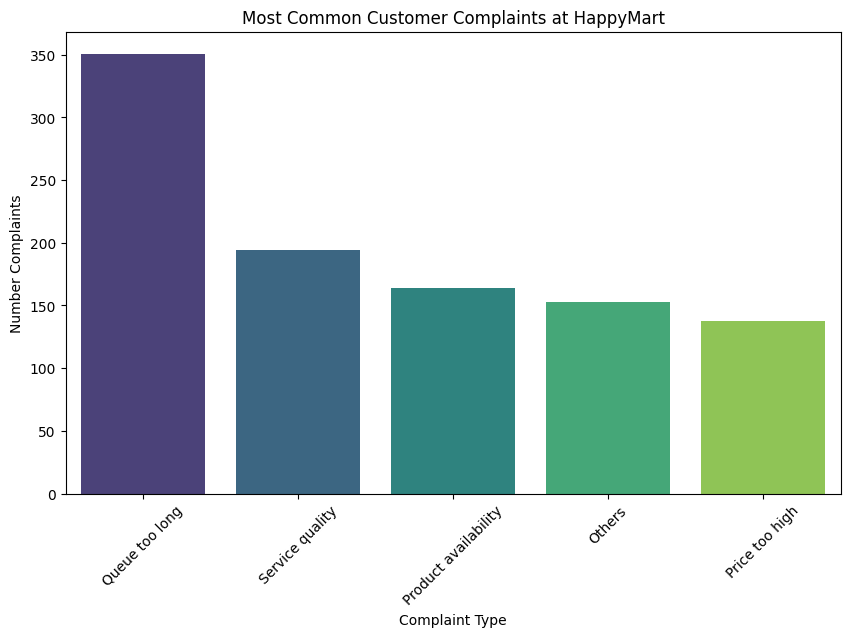

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x=complaint_type.index, y=complaint_type.values, palette="viridis")
plt.title("Most Common Customer Complaints at HappyMart")
plt.xlabel("Complaint Type")
plt.ylabel("Number Complaints")
plt.xticks(rotation=45)
plt.show()

### Analisis :

1. Antrian yang terlalu lama (Queue too long):
    - Ini adalah keluhan yang paling banyak diajukan, menunjukkan bahwa proses check-out atau pelayanan di kasir mungkin tidak efisien. Banyaknya keluhan ini bisa berpengaruh pada pengalaman belanja dan kepuasan pelanggan secara keseluruhan.
2. Kualitas layanan (Service quality):
   - Keluhan kedua terbesar terkait dengan kualitas layanan. Ini bisa menunjukkan adanya masalah dalam interaksi staf dengan pelanggan, kecepatan layanan, atau kurangnya pelatihan staf untuk menghadapi pelanggan dengan baik.
3. Ketersediaan produk (Product availability):
  - Keluhan ini mencerminkan ketidakpuasan pelanggan terhadap stok produk yang sering tidak tersedia, yang dapat menyebabkan ketidakpuasan pelanggan yang ingin membeli produk tertentu.
4. Harga terlalu tinggi (Price too high):
    - Meskipun keluhan tentang harga relatif lebih kecil dibandingkan dengan keluhan lain, ini masih menjadi faktor penting yang memengaruhi persepsi pelanggan tentang nilai yang mereka dapatkan saat berbelanja.

Solusi Pemecahan Masalah
1. Mengurangi waktu antrian:
  - Menambah jumlah kasir saat jam sibuk: Pertimbangkan untuk menambah jumlah kasir, terutama selama waktu puncak belanja seperti sore hari dan akhir pekan.
  - Menggunakan sistem self-checkout: Memperkenalkan teknologi kasir otomatis atau self-checkout untuk pelanggan yang hanya membeli sedikit barang dapat mengurangi waktu antrian.
  - Optimisasi sistem antrian: Menggunakan teknologi untuk memprediksi kapan waktu tersibuk dan menyesuaikan alokasi staf di kasir.
2. Meningkatkan kualitas layanan:
  - Pelatihan staf secara berkala: Fokus pada pelatihan layanan pelanggan untuk meningkatkan keahlian staf dalam menangani pelanggan dengan cepat dan ramah. Program pelatihan yang berkelanjutan dapat meningkatkan kualitas interaksi.
  - Sistem evaluasi kinerja staf: Menerapkan sistem evaluasi kinerja staf berdasarkan feedback pelanggan untuk memastikan standar layanan yang tinggi.
3. Memperbaiki ketersediaan produk:
  - Optimisasi manajemen inventori: Meningkatkan sistem pengelolaan stok agar barang yang sering habis cepat tersedia kembali. Sistem pemesanan otomatis berbasis data dapat membantu memprediksi kebutuhan stok.
  - Analisis pola pembelian: Menggunakan data historis untuk memprediksi permintaan dan memastikan stok barang selalu mencukupi, terutama untuk produk yang sering dicari pelanggan.
4. Menawarkan harga yang kompetitif:
  - Promosi dan diskon: Menawarkan lebih banyak diskon atau program loyalitas untuk barang-barang yang dianggap terlalu mahal bisa membantu meningkatkan persepsi nilai.
  - Komunikasi transparan tentang harga: Menyampaikan kepada pelanggan mengapa harga produk lebih tinggi, terutama jika berkaitan dengan kualitas, dapat membantu mengurangi keluhan.
  
Dengan menerapkan solusi ini, HappyMart bisa meningkatkan pengalaman pelanggan, mengurangi jumlah keluhan, dan mempertahankan loyalitas pelanggan.



## Soal 2

Bagaimana distribusi frekuensi kunjungan pelanggan? HappyMart ingin memahami pola kunjungan pelanggan mereka, seperti seberapa sering pelanggan datang ke toko—apakah mereka termasuk dalam kategori kunjungan rendah, sedang, atau tinggi.


### Jawab :

In [14]:
customer_visit_frequency = df["VisitFrequency"].value_counts() * 100 / len(df)
customer_visit_frequency


,count
VisitFrequency,
Medium,42.0
Low,38.5
High,19.5


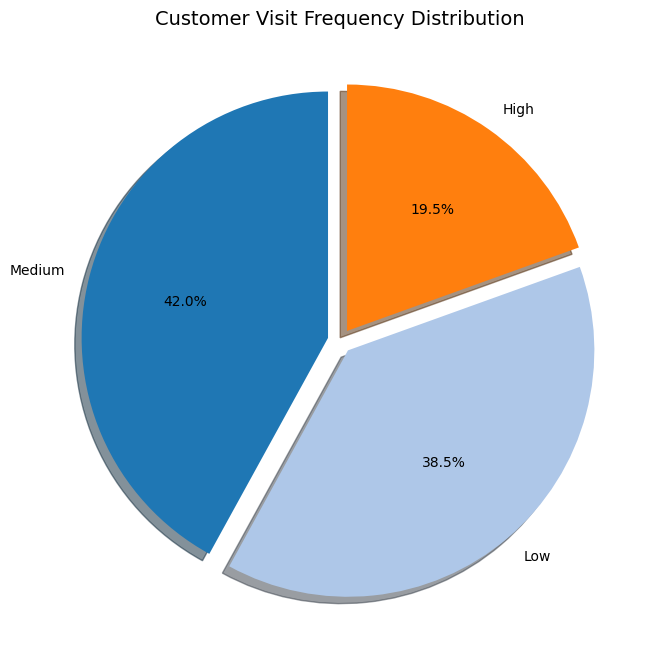

In [15]:
# Membuat pie chart
plt.figure(figsize=(8, 8))
customer_visit_frequency.plot.pie(
    autopct='%1.1f%%',  # Menampilkan persentase dengan 1 angka desimal
    startangle=90,      # Memulai dari sudut 90 derajat
    colors=plt.cm.tab20.colors,  # Warna pie chart
    explode=[0.05] * len(customer_visit_frequency),  # Memberi efek explode untuk semua segmen
    shadow=True         # Menambahkan bayangan
)

# Menambahkan judul
plt.title("Customer Visit Frequency Distribution", fontsize=14)

# Menampilkan pie chart
plt.ylabel("")  # Menghilangkan label sumbu Y
plt.show()


### Analisis :

- Sebagian besar pelanggan berada di kategori kunjungan sedang dan rendah, yang mungkin menunjukkan bahwa banyak pelanggan tidak datang terlalu sering, atau mungkin mereka hanya mengunjungi HappyMart untuk kebutuhan tertentu.
- Pelanggan dengan kunjungan tinggi adalah pelanggan setia yang cenderung lebih sering berbelanja, tetapi jumlah mereka relatif lebih sedikit dibandingkan kategori lainnya.

Rekomendasi:
- Meningkatkan loyalitas pelanggan dengan kunjungan rendah dan sedang:
Menawarkan program loyalitas atau insentif bagi pelanggan dengan frekuensi kunjungan rendah dan sedang, seperti diskon khusus atau poin rewards, bisa meningkatkan kunjungan mereka.
- Fokus pada pelanggan dengan kunjungan tinggi:
Mempertahankan pelanggan dengan kunjungan tinggi melalui layanan yang lebih personal, seperti penawaran eksklusif, bisa membantu mempertahankan tingkat kunjungan mereka dan meningkatkan kepuasan.


## Soal 3

Bagaimana pengaruh waktu tunggu terhadap tingkat kepuasan pelanggan? HappyMart ingin mengetahui apakah ada hubungan antara lamanya waktu antrian yang dialami pelanggan dengan tingkat kepuasan mereka. Apakah semakin lama antrian, semakin rendah tingkat kepuasannya?


### Jawab :

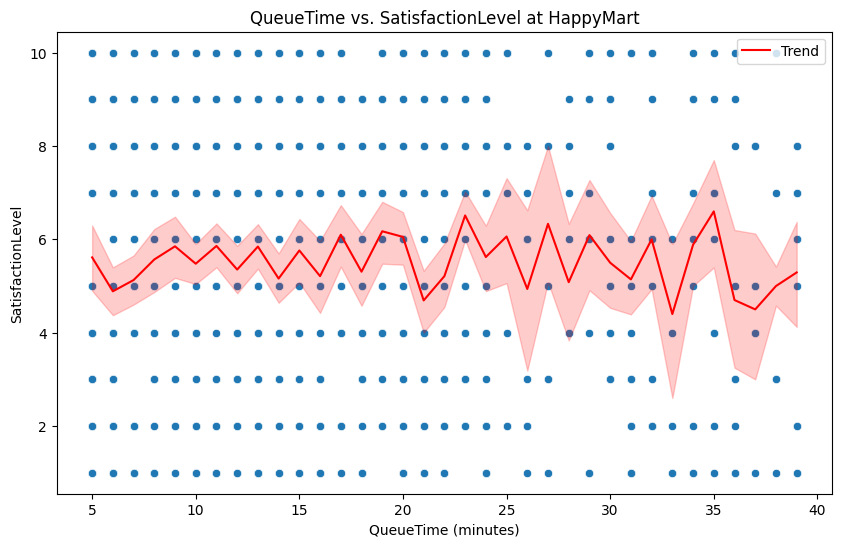

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="QueueTime", y="SatisfactionLevel", data=df)
# Calculate the rolling mean and assign it to a new column in the DataFrame
df["RollingSatisfaction"] = df["SatisfactionLevel"].rolling(2).mean()
sns.lineplot(x="QueueTime", y="RollingSatisfaction", data=df, color="red", label="Trend")
plt.title("QueueTime vs. SatisfactionLevel at HappyMart")
plt.xlabel("QueueTime (minutes)")
plt.ylabel("SatisfactionLevel")
plt.legend()
plt.show()


### Analisis :

Meskipun secara umum diasumsikan bahwa antrian yang panjang akan mengurangi kepuasan pelanggan, data dari HappyMart tidak menunjukkan hubungan kuat antara kedua faktor tersebut. Mungkin ada faktor lain yang lebih memengaruhi kepuasan, seperti kualitas layanan, produk yang tersedia, atau harga.

## Soal 4

Berapa persentase pelanggan yang menyatakan mereka akan kembali? Mengetahui persentase pelanggan yang ingin kembali ke toko akan membantu HappyMart dalam menilai seberapa loyal pelanggan terhadap layanan mereka.


### Jawab :

In [20]:
## Pelanggan Kembali dan Tidak Kembali
return_rate = df["ReturnLikelihood"].value_counts() * 100 / len(df)
return_rate

,count
ReturnLikelihood,
Yes,52.2
No,47.8


### Analisis :

Berdasarkan data yang menunjukkan bahwa sekitar 47.8% pelanggan tidak berencana untuk kembali.

Untuk meningkatkan loyalitas pelanggan, HappyMart perlu fokus pada meningkatkan pengalaman berbelanja, memberikan penawaran yang menarik dan dipersonalisasi, memperbaiki kualitas layanan, dan meningkatkan ketersediaan produk. Melalui strategi-strategi ini, HappyMart dapat memperkuat loyalitas pelanggan dan meningkatkan persentase pelanggan yang kembali ke toko.

## Soal 5

Bagaimana hubungan antara tingkat kepuasan pelanggan dengan frekuensi kunjungan? Apakah pelanggan yang lebih sering mengunjungi memiliki tingkat kepuasan yang lebih tinggi? Tim ingin melihat apakah pelanggan yang sering datang ke toko lebih puas dengan layanan dibandingkan dengan mereka yang jarang berkunjung.


### Jawab :

In [21]:
# Rata-rata tingkat kepuasan pelanggan berdasarkan tingkat kunjungan
rate_of_satisfaction_by_visit_frequency = df.groupby("VisitFrequency")["SatisfactionLevel"].mean()
rate_of_satisfaction_by_visit_frequency

,SatisfactionLevel
VisitFrequency,
High,5.394872
Low,5.519481
Medium,5.695238


### Analisis :

Pelanggan dengan frekuensi kunjungan sedang memiliki tingkat kepuasan rata-rata yang sedikit lebih tinggi dibandingkan dengan pelanggan yang sering atau jarang berkunjung. Pelanggan dengan kunjungan tinggi justru memiliki tingkat kepuasan terendah dari ketiga kelompok.

- Pelanggan yang lebih sering datang (kunjungan tinggi) mungkin memiliki harapan yang lebih tinggi terhadap layanan, dan jika ekspektasi tersebut tidak terpenuhi, hal ini dapat menyebabkan tingkat kepuasan yang lebih rendah.
- Pelanggan yang berkunjung dengan frekuensi sedang tampaknya lebih puas dengan pengalaman mereka, mungkin karena layanan yang mereka terima sesuai dengan harapan mereka.


## Soal 6

Apakah pelanggan yang membelanjakan lebih banyak uang cenderung lebih puas dibandingkan dengan pelanggan yang pengeluarannya lebih rendah? Analisis ini akan memberikan wawasan mengenai hubungan antara nilai transaksi dengan tingkat kepuasan.


### Jawab :

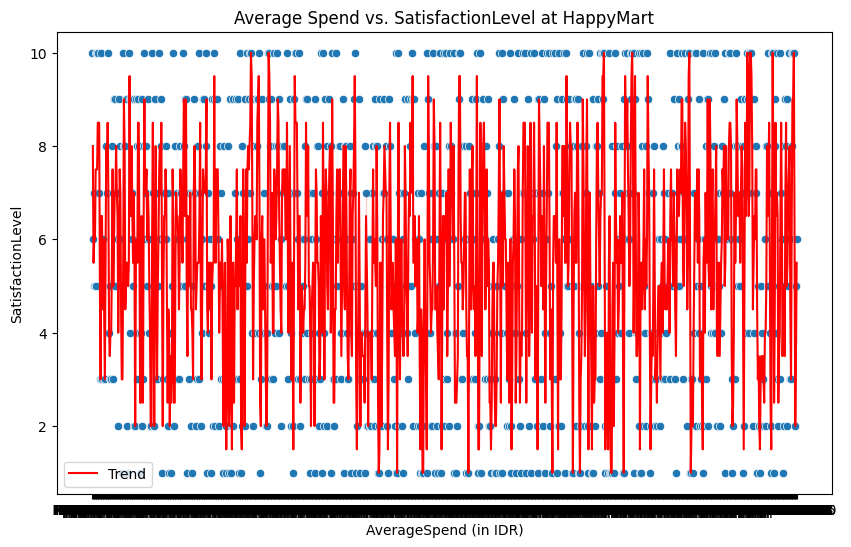

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="AverageSpend", y="SatisfactionLevel", data=df)
# Calculate the rolling mean and assign it to a new column in the DataFrame
df["RollingSatisfaction"] = df["SatisfactionLevel"].rolling(2).mean()
sns.lineplot(x="AverageSpend", y="RollingSatisfaction", data=df, color="red", label="Trend")
plt.title("Average Spend vs. SatisfactionLevel at HappyMart")
plt.xlabel("AverageSpend (in IDR)")
plt.ylabel("SatisfactionLevel")
plt.legend()
plt.show()

### Analisis :

Pelanggan yang membelanjakan lebih banyak uang tidak menunjukkan kecenderungan untuk merasa lebih puas dibandingkan dengan pelanggan yang pengeluarannya lebih rendah. Tingkat kepuasan pelanggan tampaknya tidak bergantung pada seberapa banyak mereka membelanjakan.

## Soal 7

Apakah ada perbedaan tingkat kemungkinan kembali (Return Likelihood) antara kelompok pelanggan dengan frekuensi kunjungan yang berbeda? Apakah pelanggan yang sering berkunjung cenderung lebih mungkin untuk kembali? Mengetahui apakah pelanggan dengan frekuensi kunjungan yang lebih tinggi lebih cenderung kembali akan membantu HappyMart merancang program loyalitas yang tepat.


### Jawab :

In [30]:
# Calculate the proportion of customers by visit frequency and return likelihood
propotion_of_customer = df.groupby("VisitFrequency")["ReturnLikelihood"].value_counts(normalize=True) * 100 / len(df)

# Reset index to convert the Series into a DataFrame
propotion_of_customer_df = propotion_of_customer.reset_index(name="propotion_of_customer")
propotion_of_customer_df

,VisitFrequency,ReturnLikelihood,propotion_of_customer
0,High,Yes,0.051282
1,High,No,0.048718
2,Low,Yes,0.050390
3,Low,No,0.049610
4,Medium,Yes,0.054286
5,Medium,No,0.045714


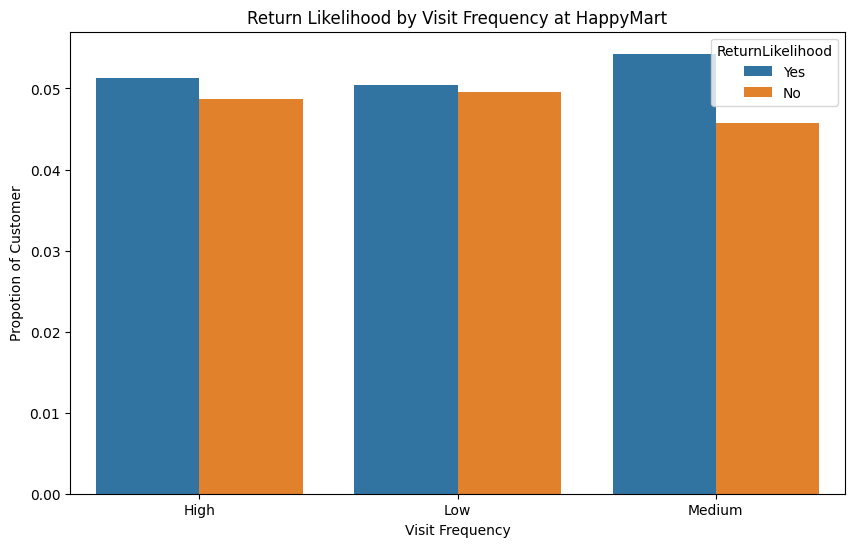

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x="VisitFrequency", y="propotion_of_customer", hue="ReturnLikelihood", data=propotion_of_customer_df)
plt.title("Return Likelihood by Visit Frequency at HappyMart")
plt.xlabel("Visit Frequency")
plt.ylabel("Propotion of Customer")
plt.show()

### Analisis :

Berdasarkan analisis, berikut adalah persentase pelanggan yang kemungkinan akan kembali (Yes) berdasarkan frekuensi kunjungan:
1. Frekuensi Kunjungan Tinggi (High): 51.3% pelanggan menyatakan akan kembali.
2. Frekuensi Kunjungan Rendah (Low): 50.4% pelanggan menyatakan akan kembali.
3. Frekuensi Kunjungan Sedang (Medium): 54.3% pelanggan menyatakan akan kembali.

- Pelanggan dengan frekuensi kunjungan sedang memiliki kemungkinan terbesar untuk kembali ke toko (54.3%).
- Pelanggan dengan frekuensi kunjungan tinggi dan rendah memiliki persentase yang hampir sama, dengan sedikit keunggulan pada kunjungan tinggi.

